# Introduction
This project analyses at the Superstore Sales Dataset, which has a lot of information about orders made through a retail superstore, such as sales, profit, discounts, categories, and customer regions.
The goal of this analysis is to look at the dataset, learn about important business trends, find areas that are making money and those that aren't, and get ideas that could help sales and marketing strategies make better decisions.
This analysis uses data cleaning and visualisation methods to find patterns in sales and profit distribution, customer behaviour, and performance by region.
The dataset offers us several of opportunities to carry out Exploratory Data Analysis (EDA), which helps us figure out what renders a business profitable and how discounts, categories, and regional preferences affect performance.

In [ ]:

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", None)
sns.set_theme()

# 2. Load Dataset
df = pd.read_csv("SampleSuperstore.csv", encoding="latin1")

# First look at dataset
df.head()

In [ ]:
# Shape of dataset (rows, columns)
print("Dataset shape:", df.shape)

# Column names and data types
print("\nDataset Info:")
print(df.info())

# Quick summary of numeric columns
print("\nSummary Statistics:")
print(df.describe())



Dataset shape: (9994, 21)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales      

In [ ]:
# Missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())


Missing values per column:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Number of duplicate rows: 0


In [ ]:

# Drop duplicates 
df = df.drop_duplicates().reset_index(drop=True)

# Convert date columns 
if "order_date" in df.columns:
    df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")
if "ship_date" in df.columns:
    df["ship_date"] = pd.to_datetime(df["ship_date"], errors="coerce")

# Convert numeric columns 
for col in ["sales", "profit", "discount", "quantity"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Filling columns for a clean and neat output 
#    For categorical, fill missing with "Unknown" or mode
#    For numeric, fill missing with median 
cat_cols = df.select_dtypes(include="object").columns.tolist()
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Fill categoricals with mode 
for c in cat_cols:
    if df[c].isnull().any():
        df[c] = df[c].fillna(df[c].mode().iloc[0] if not df[c].mode().empty else "Unknown")

# Fill numerics with median 
for c in num_cols:
    if df[c].isnull().any():
        df[c] = df[c].fillna(df[c].median())

# Derived columns 
if "order_date" in df.columns:
    df["order_year"] = df["order_date"].dt.year
    df["order_month"] = df["order_date"].dt.to_period("M").astype(str)

# Final checks
print("\nAfter cleaning - shape:", df.shape)
print("\nMissing values now:\n", df.isnull().sum())
display(df.info())

# Saving a cleaned CSV version of the dataset
df.to_csv("superstore_cleaned.csv", index=False)


After cleaning - shape: (9994, 23)

Missing values now:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
profit_margin    0
Profit Margin    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non

None

# Univariate Analysis 
Univariate analysis is the process of examining at and summarising the data for just one variable at a time. The goal is to understand the distribution, central tendency, and spread of individual features. 
This project uses univariate analysis to examine at each key attribute on its own, like Sales, Profit, Discount, and Category.  This helps find patterns, like which category has the most orders, and spot outliers or distributions that are  skewed. 
For example, in this project its used to:
Finding out which region or product category has the most sales.
How discounts are given out.
Seeing how profit changes when different variables are taken into account.

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,NaN,NaN,4,793,793,3,1,531,49,NaN,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,NaN,NaN,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,NaN,NaN,5968,37,37,5191,9994,915,2001,NaN,3203,19,6026,1523,48,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
min,1.000000,NaN,2014-01-03 00:00:00,2014-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,2015-05-23 00:00:00,2015-05-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,NaN,2016-06-26 00:00:00,2016-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,NaN,2017-05-14 00:00:00,2017-05-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000
max,9994.000000,NaN,2017-12-30 00:00:00,2018-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99301.000000,NaN,NaN,NaN,NaN,NaN,22638.480000,14.000000,0.800000,8399.976000


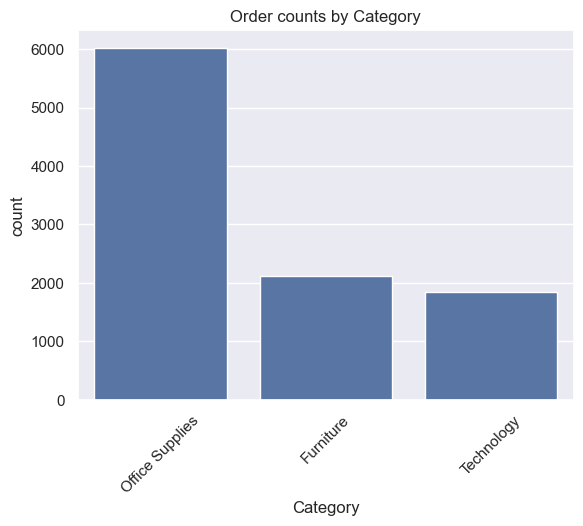

In [ ]:
# Basic stats
display(df.describe(include="all"))

# Top categories (count)
plt.figure()
sns.countplot(data=df, x="Category", order=df["Category"].value_counts().index)
plt.title("Order counts by Category")
plt.xticks(rotation=45)
plt.show()

The most orders are for office supplies, which are followed by furniture and technology.
Office supplies account for the majority of sales transactions, indicating that this is the most popular product category.  In contrast, orders for technology and furniture are much lower.  This means the following for business strategy:
Office supplies should always be well-stocked because of to supply chain and inventory management.
To balance category performance, marketing campaigns for technology and furniture might need to be stepped up.
Since a higher order volume does not always translate into higher profit margins, profitability analysis should also be looked into.

,Sub-Category,Sales
0,Phones,330007.0540
1,Chairs,328449.1030
2,Storage,223843.6080
3,Tables,206965.5320
4,Binders,203412.7330
5,Machines,189238.6310
6,Accessories,167380.3180
7,Copiers,149528.0300
8,Bookcases,114879.9963
9,Appliances,107532.1610


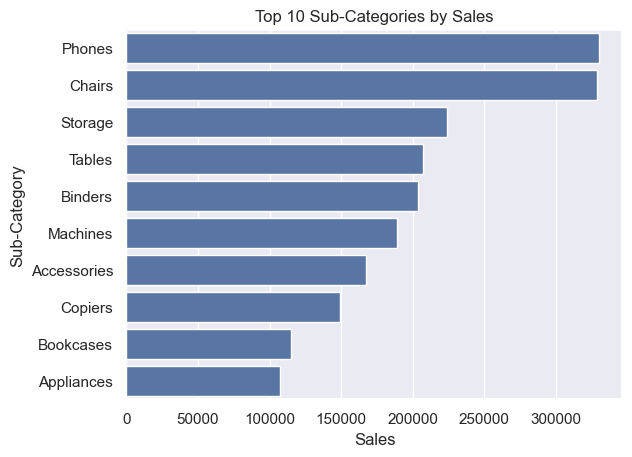

In [ ]:
# Top Sub-Category by sales (sum)
top_subcats = df.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False).reset_index()
display(top_subcats.head(10))
plt.figure()
sns.barplot(data=top_subcats.head(10), x="Sales", y="Sub-Category")
plt.title("Top 10 Sub-Categories by Sales")
plt.show()


The subcategories with the highest sales are Phones, Chairs, and Binder Storage. This can indicate that sales revenue is concentrated on the few high-performing products, which can hinder the business's flexibility and income. Promotions and sales strategies can be employed to target both high-revenue subcategory products to further boost income and low-performing products to increase their revenue as well. 

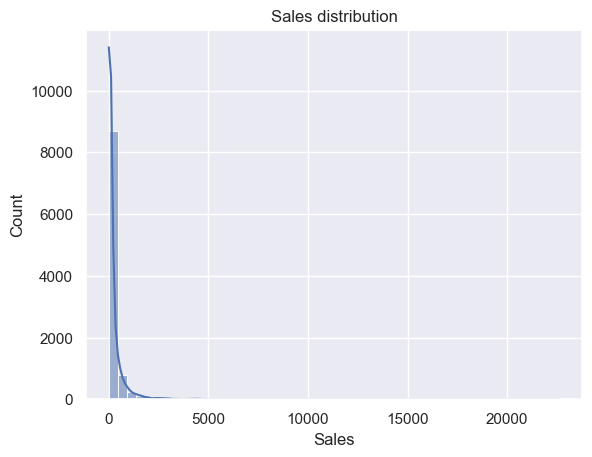

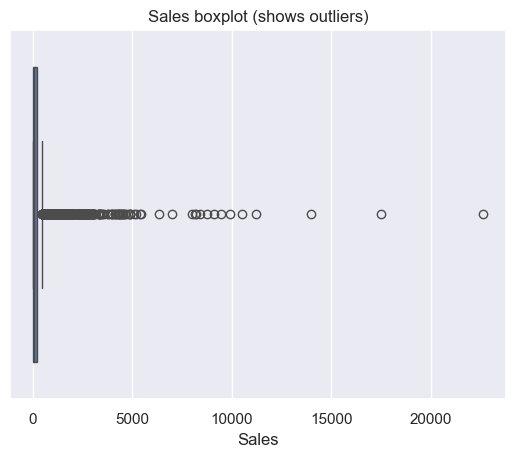

In [ ]:
# Sales distribution (hist + box)
plt.figure()
sns.histplot(df["Sales"], bins=50, kde=True)
plt.title("Sales distribution")
plt.show()
plt.figure()
sns.boxplot(x=df["Sales"])
plt.title("Sales boxplot (shows outliers)")
plt.show()


The company deals primarily in small-value orders, as shown by the majority of sales transactions being under $500.
The distribution is skewed to the right due to a few extreme outliers (sales over $5,000 to $20,000).
Although the company mostly depends on a large number of low-value transactions, the occasional large-value order makes a substantial contribution to overall revenue.  These valuable clients make up a significant market segment; offering them individualised deals, loyalty plans, or first-rate services may help keep them and boost sales.

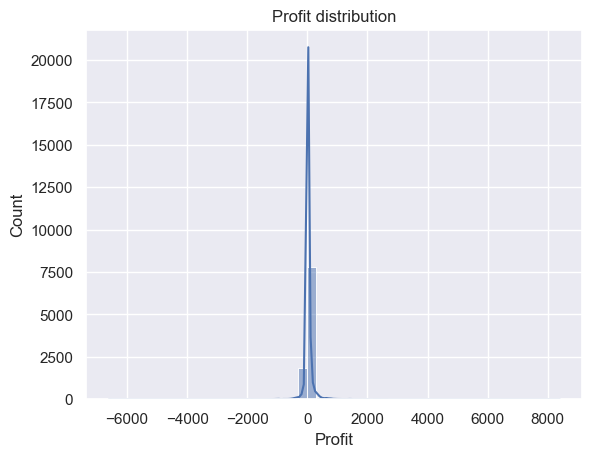

Number of transactions with negative profit: 1871


In [ ]:
# Profit distribution and negative-profit count
plt.figure()
sns.histplot(df["Profit"], bins=50, kde=True)
plt.title("Profit distribution")
plt.show()

neg_profit = (df["Profit"] < 0).sum()
print(f"Number of transactions with negative profit: {neg_profit}")

Transactions with negative profits do occur, particularly in the furniture and technology categories. Negative profits could be a sign of excessive discounting, high expenses, or problems with pricing.  To maintain profit margins, these areas need more investigation.

Discount
0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
Name: count, dtype: int64


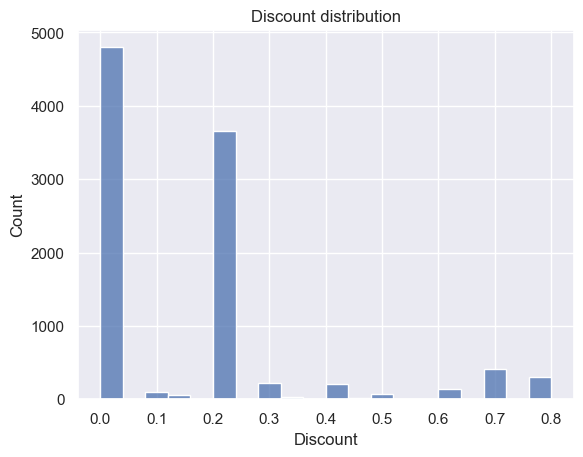

In [ ]:
# Discount counts (how common are discounts)
if "Discount" in df.columns:
    print(df["Discount"].value_counts().head(10))
    plt.figure()
    sns.histplot(df["Discount"], bins=20)
    plt.title("Discount distribution")
    plt.show()

The majority of discounts fall between 0%, 10%, and 20%. Extremely high discounts are found in very few orders.
Profits are impacted by selective discounting. Tracking the effectiveness of discounts can help in finding a balance between margin protection and sales growth.


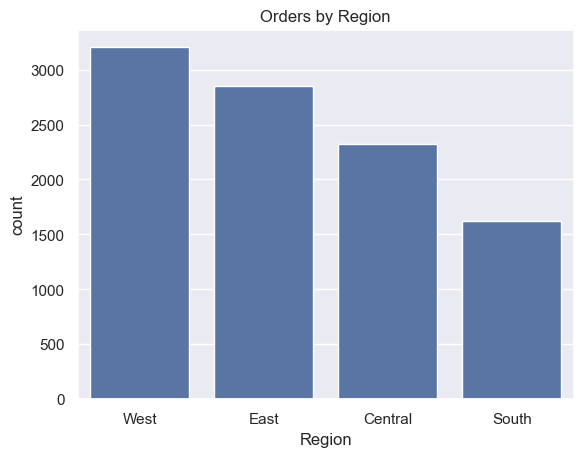

In [ ]:
# Orders by Region
if "Region" in df.columns:
    plt.figure()
    sns.countplot(data=df, x="Region", order=df["Region"].value_counts().index)
    plt.title("Orders by Region")
    plt.show()

Order counts are lowest in the South and highest in the West and Central regions. Sales vary by region here. To maximise operations, resources, marketing, and inventory allocation should take regional demand into account. 

# Bivariate analysis
Bivariate analysis examines at how two variables are related to each other to see how one might affect the other.
In this project, bivariate analysis is used to helps find correlations and dependencies between sales, profit, discounts, and regions.  It reveals more information than just looking at one variable at a time. For example, it can show you if bigger discounts lead to lower profits or which areas do better for certain types of products.
Example in this project it is used to:
Exploring how Discount impacts Profit.
Finding trends in profitability by analysing sales and profits.
Comparing Region vs Category to identify regional preferences.

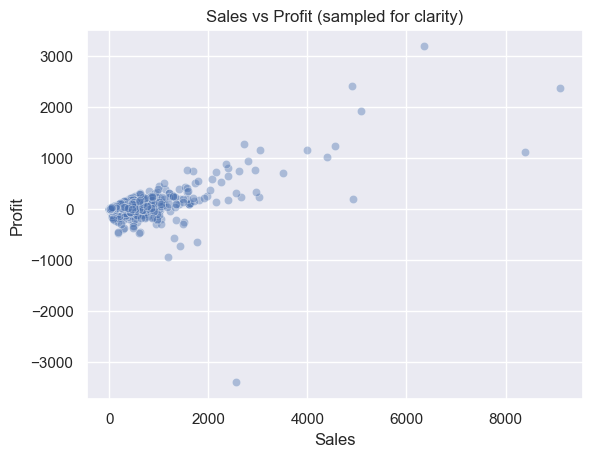

In [ ]:
# 1. Sales vs Profit scatter (with alpha to show density)
plt.figure()
sns.scatterplot(data=df.sample(min(2000, len(df)), random_state=1), x="Sales", y="Profit", alpha=0.4)
plt.title("Sales vs Profit (sampled for clarity)")
plt.show()

Although more sales usually translate into higher profits, some high-sales transactions still result in low or negative profits. Profit is not assured by high sales alone. Product mix, cost structure, and discounts can all have an impact on profitability and should be carefully considered.

,Discount,Profit
0,0.00,66.900292
1,0.10,96.055074
2,0.15,27.288298
3,0.20,24.702572
4,0.30,-45.679636
5,0.32,-88.560656
6,0.40,-111.927429
7,0.45,-226.646464
8,0.50,-310.703456
9,0.60,-43.077212


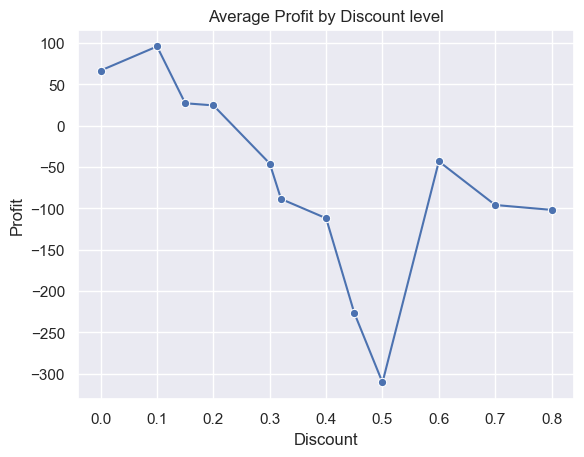

In [ ]:
# 2. Discount vs Profit (grouped)
if "Discount" in df.columns:
    dgp = df.groupby("Discount")["Profit"].mean().reset_index()
    display(dgp.head(10))
    plt.figure()
    sns.lineplot(data=dgp, x="Discount", y="Profit", marker="o")
    plt.title("Average Profit by Discount level")
    plt.show()

As discount levels rise, average profit falls. Profit margins are lowered by excessive discounting. Strategies for pricing and discounts must take profitability into account so that it can be balanced and profits are not impacted. 

C:\Users\HI\AppData\Local\Temp\ipykernel_11724\2360402925.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_monthly = df_time["Sales"].resample("M").sum().reset_index()


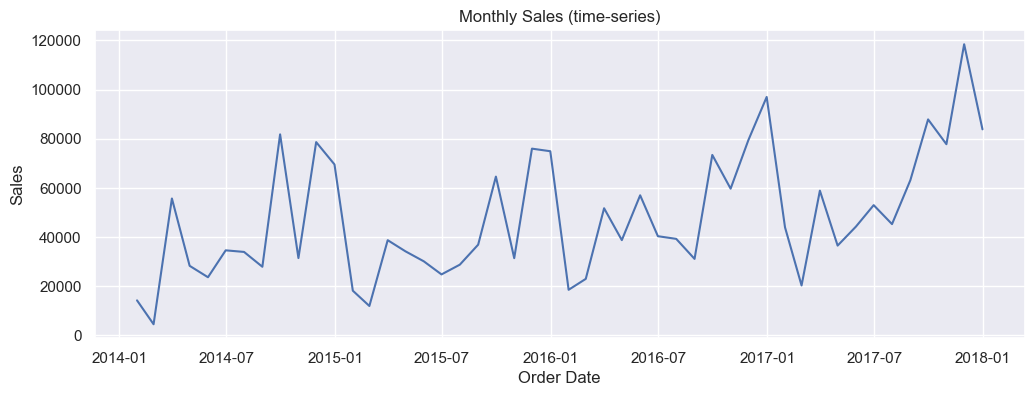

In [ ]:
# Ensure order_date is datetime
df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce") 
# its important here because resample("M") requires the index to be a datetime type (DatetimeIndex) or else it displays a type error.

# Drop missing dates if any
df = df.dropna(subset=["Order Date"])

# Set order_date as index
df_time = df.set_index("Order Date")

# Resample monthly and sum sales
sales_monthly = df_time["Sales"].resample("M").sum().reset_index()

# Plot
plt.figure(figsize=(12,4))
sns.lineplot(data=sales_monthly, x="Order Date", y="Sales")
plt.title("Monthly Sales (time-series)")
plt.show()

November through December is when sales are at their highest, and January through February is when they drop.
The data clearly shows seasonality. Company can schedule promotions, staffing, and inventory around these high and low times.

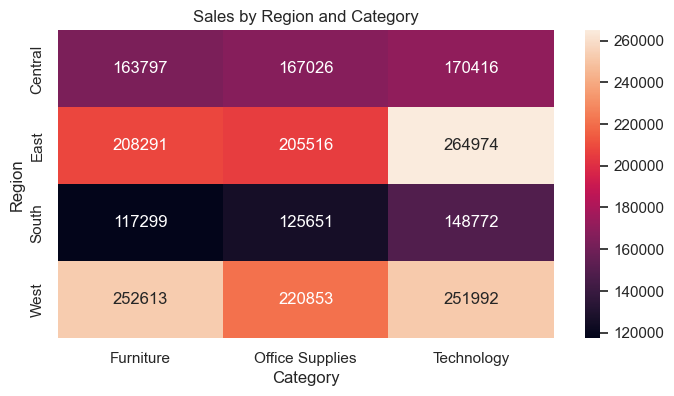

In [ ]:
# 4. Pivot: Region vs Category (sales heatmap)
if {"Region","Category"}.issubset(df.columns):
    pivot = df.pivot_table(index="Region", columns="Category", values="Sales", aggfunc="sum").fillna(0)
    plt.figure(figsize=(8,4))
    sns.heatmap(pivot, annot=True, fmt=".0f")
    plt.title("Sales by Region and Category")
    plt.show()

Certain regions have a preference for certain categories: Central prefers furniture, West buys more technology, etc.
To effectively satisfy consumer preferences, regional demand patterns can direct targeted marketing and inventory distribution.

,Category,Profit Margin
2,Technology,0.156138
1,Office Supplies,0.138030
0,Furniture,0.038784


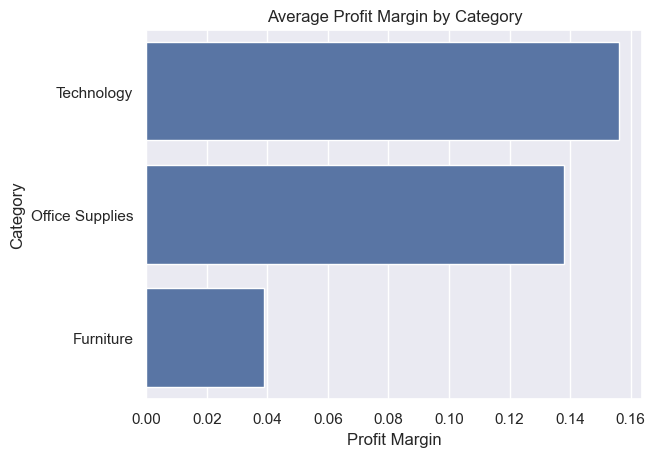

In [ ]:
# 5. Profit margin by Category (profit / sales)
df["Profit Margin"] = np.where(df["Sales"]!=0, df["Profit"]/df["Sales"], np.nan)
pm = df.groupby("Category")["Profit Margin"].mean().reset_index().sort_values(by="Profit Margin", ascending=False)
display(pm)
plt.figure()
sns.barplot(data=pm, x="Profit Margin", y="Category")
plt.title("Average Profit Margin by Category")
plt.show()


Despite fewer orders, technology has larger profit margins than office supplies. For profitability, the business should pay more attention to high-margin categories than to overall sales volume.


In [ ]:
# 6. Top customers by Sales & Profit
if "Customer Name" in df.columns or "Customer ID" in df.columns:
    cust_key = "Customer ID" if "Customer ID" in df.columns else "Customer Name"
    top_customers = df.groupby(cust_key).agg({"Sales":"sum","Profit":"sum"}).sort_values("Sales", ascending=False).head(10)
    display(top_customers)

,Sales,Profit
Customer ID,,
SM-20320,25043.050,-1980.7393
TC-20980,19052.218,8981.3239
RB-19360,15117.339,6976.0959
TA-21385,14595.620,4703.7883
AB-10105,14473.571,5444.8055
KL-16645,14175.229,806.8550
SC-20095,14142.334,5757.4119
HL-15040,12873.298,5622.4292
SE-20110,12209.438,2650.6769


A sizable amount of sales and profit are generated by a small group of clients.  To keep high-value accounts, these important clients should be given priority in loyalty programs and tailored marketing so that it increases their satisfaction and help business to retain them.

# Conclusion 
According to the exploratory analysis, a small number of high-value transactions greatly increase overall revenue, but the majority of sales are from small, low-value orders.  Office supplies account for the majority of sales, but technology offers greater profitability, while furniture is affected by costs and discounts.  Order counts are driven by consumer purchases, but corporate customers add greater value to each transaction. O verall, the company relies on maintaining a balance between fewer high-value, high-margin customers and high-volume, low-margin sales.  Long-term growth can be improved by concentrating on profitable categories and refining discount tactics.